In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['axes.grid'] = True

raw = pd.read_csv('./data/lab4_10.csv', header=None).values.flatten()

assert raw.size % 2 == 0, 'liczba elementów nie jest parzysta'
X = raw.reshape(-1, 2)
N = X.shape[0]

mu = X.mean(axis=0)
B = X - mu
print('Środek (mu) =', mu)

C = (B.T @ B) / (N - 1)

w, V = np.linalg.eigh(C)
idx = np.argsort(w)[::-1]
w = w[idx]
V = V[:, idx]

explained = w / w.sum()

U, S, VT = np.linalg.svd(B, full_matrices=False)
V_svd = VT.T

lambda_from_svd = (S**2) / (N - 1)

pc1 = V[:, 0]
angle_deg = np.degrees(np.arctan2(pc1[1], pc1[0]))

angle_axis = angle_deg % 180

Środek (mu) = [0.87451599 0.8800864 ]


zgodność PC1: 0.9999999999999998
zgodność PC2: 0.9999999999999998


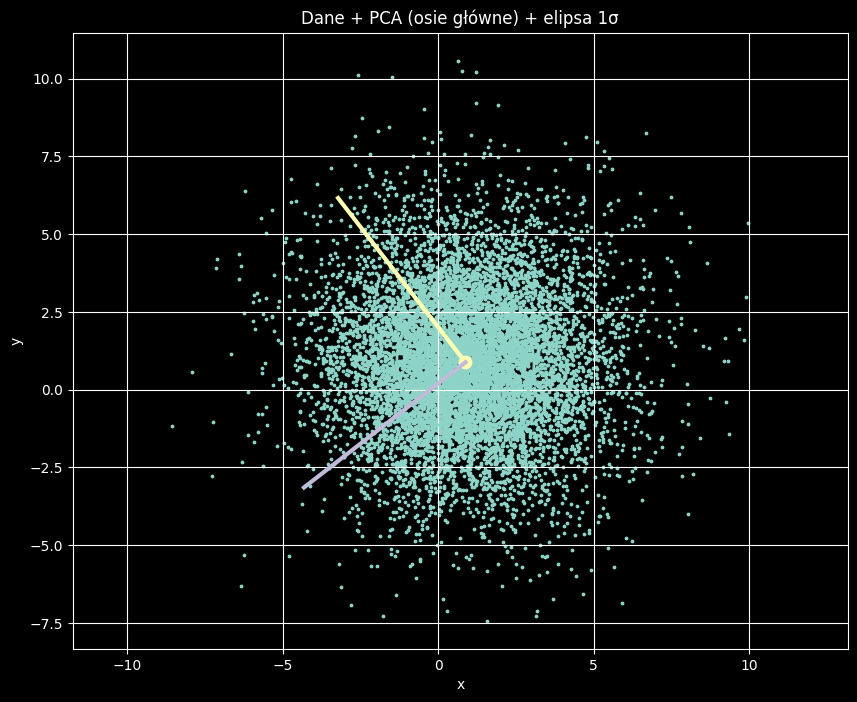

In [6]:
theta = np.linspace(0, 2*np.pi, 400)
unit_circle = np.vstack([np.cos(theta), np.sin(theta)])

radii = np.sqrt(w)
ellipse = (V @ np.diag(radii) @ unit_circle).T + mu

scale = 3.0
pc1_end = mu + scale * np.sqrt(w[0]) * V[:, 0]
pc2_end = mu + scale * np.sqrt(w[1]) * V[:, 1]

print("zgodność PC1:", abs(V[:,0] @ V_svd[:,0]))
print("zgodność PC2:", abs(V[:,1] @ V_svd[:,1]))

plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=3)
plt.plot(ellipse[:, 0], ellipse[:, 1], linewidth=2)
plt.plot([mu[0], pc1_end[0]], [mu[1], pc1_end[1]], linewidth=3)
plt.plot([mu[0], pc2_end[0]], [mu[1], pc2_end[1]], linewidth=3)
plt.scatter([mu[0]], [mu[1]], s=80)
plt.title('Dane + PCA (osie główne) + elipsa 1σ')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

In [5]:
print('mu =', mu)
print('lambda (wariancje) =', w)
print('PC (kolumny V) =\n', V)
print('kąt osi PC1 (0..180) = %.6f°' % angle_axis)


mu = [0.87451599 0.8800864 ]
lambda (wariancje) = [4.96351564 4.79510635]
PC (kolumny V) =
 [[-0.61267674 -0.79033361]
 [ 0.79033361 -0.61267674]]
kąt osi PC1 (0..180) = 127.783301°
